Import Library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

Masukkan dataset

In [4]:
dataset = pd.read_csv('dataset/datatrain.csv')
dataset.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
dataset.shape

(400, 26)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Hapus kolom ID

In [7]:
dataset.drop(['id'], axis=1, inplace=True)

Rename nama Kolom agar mudah dipahami

In [8]:
dataset.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
dataset.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Mengganti beberapa tipe data agar menjadi numerik

In [11]:
dataset['packed_cell_volume'] = pd.to_numeric(dataset['packed_cell_volume'], errors='coerce')
dataset['white_blood_cell_count'] = pd.to_numeric(dataset['white_blood_cell_count'], errors='coerce')
dataset['red_blood_cell_count'] = pd.to_numeric(dataset['red_blood_cell_count'], errors='coerce')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Memisahkan Data numerik dengan data categorial

In [13]:
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']

In [14]:
for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



Membersihkan Data categorial yang salah ketik

In [15]:
dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dataset['coronary_artery_disease'] = dataset['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

dataset['class'] = dataset['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [16]:
dataset['class'] = dataset['class'].map({'ckd': 1, 'not ckd': 0})
dataset['class'] = pd.to_numeric(dataset['class'], errors='coerce')

In [17]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {dataset[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



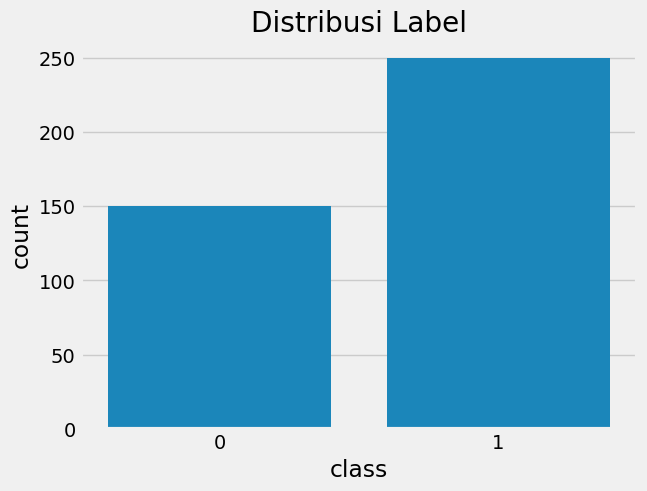

In [18]:
sns.countplot(x='class', data=dataset)
plt.title('Distribusi Label')
plt.show()

Pemrosesan Data

In [19]:
dataset.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [20]:
dataset[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [21]:
dataset[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [22]:
def random_value_imputation(feature):
    random_sample = dataset[feature].dropna().sample(dataset[feature].isna().sum())
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].fillna(mode)

In [23]:
for col in num_cols:
    random_value_imputation(col)

In [24]:
dataset[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [25]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [26]:
dataset[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [27]:
dataset['red_blood_cells'] = dataset['red_blood_cells'].map({'normal': 1, 'abnormal': 0})
dataset['red_blood_cells'] = pd.to_numeric(dataset['red_blood_cells'], errors='coerce')
dataset['pus_cell'] = dataset['pus_cell'].map({'normal': 1, 'abnormal': 0})
dataset['pus_cell'] = pd.to_numeric(dataset['pus_cell'], errors='coerce')
dataset['pus_cell_clumps'] = dataset['pus_cell_clumps'].map({'notpresent': 0, 'present': 1})
dataset['pus_cell_clumps'] = pd.to_numeric(dataset['pus_cell_clumps'], errors='coerce')
dataset['bacteria'] = dataset['bacteria'].map({'notpresent': 0, 'present': 1})
dataset['bacteria'] = pd.to_numeric(dataset['bacteria'], errors='coerce')
dataset['hypertension'] = dataset['hypertension'].map({'no': 0, 'yes': 1})
dataset['hypertension'] = pd.to_numeric(dataset['hypertension'], errors='coerce')
dataset['diabetes_mellitus'] = dataset['diabetes_mellitus'].map({'no': 0, 'yes': 1})
dataset['diabetes_mellitus'] = pd.to_numeric(dataset['diabetes_mellitus'], errors='coerce')
dataset['coronary_artery_disease'] = dataset['coronary_artery_disease'].map({'no': 0, 'yes': 1})
dataset['coronary_artery_disease'] = pd.to_numeric(dataset['coronary_artery_disease'], errors='coerce')
dataset['appetite'] = dataset['appetite'].map({'poor': 0, 'good': 1})
dataset['appetite'] = pd.to_numeric(dataset['appetite'], errors='coerce')
dataset['peda_edema'] = dataset['peda_edema'].map({'no': 0, 'yes': 1})
dataset['peda_edema'] = pd.to_numeric(dataset['peda_edema'], errors='coerce')
dataset['aanemia'] = dataset['aanemia'].map({'no': 0, 'yes': 1})
dataset['aanemia'] = pd.to_numeric(dataset['aanemia'], errors='coerce')

In [28]:
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
maindata = dataset[['age', 'sodium', 'sugar', 'blood_urea', 'potassium', 'appetite', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'peda_edema', 'class']]

In [30]:
cobalagi = maindata.drop(columns=['sodium'])

In [31]:
inilagi = cobalagi.drop(columns=['blood_urea'])

In [32]:
gula_mapping={
    0.0 : 10,
    1.0: 150,
    2.0: 500,
    3.0: 1000,
    4.0: 2000,
    5.0: 2500
}

In [33]:
inilagi['sugar'] = inilagi['sugar'].map(gula_mapping)

In [34]:
ind_col = [col for col in inilagi.columns if col != 'class']
dep_col = 'class'

X = inilagi[ind_col]
y = inilagi[dep_col]

In [35]:
inilagi.head()

,age,sugar,potassium,appetite,hypertension,diabetes_mellitus,coronary_artery_disease,peda_edema,class
0,48.0,10,4.6,1,1,1,0,0,1
1,7.0,10,3.7,1,0,0,0,0,1
2,62.0,1000,5.0,0,0,1,0,0,1
3,48.0,10,2.5,0,1,0,0,1,1
4,51.0,10,2.9,1,0,0,0,0,1


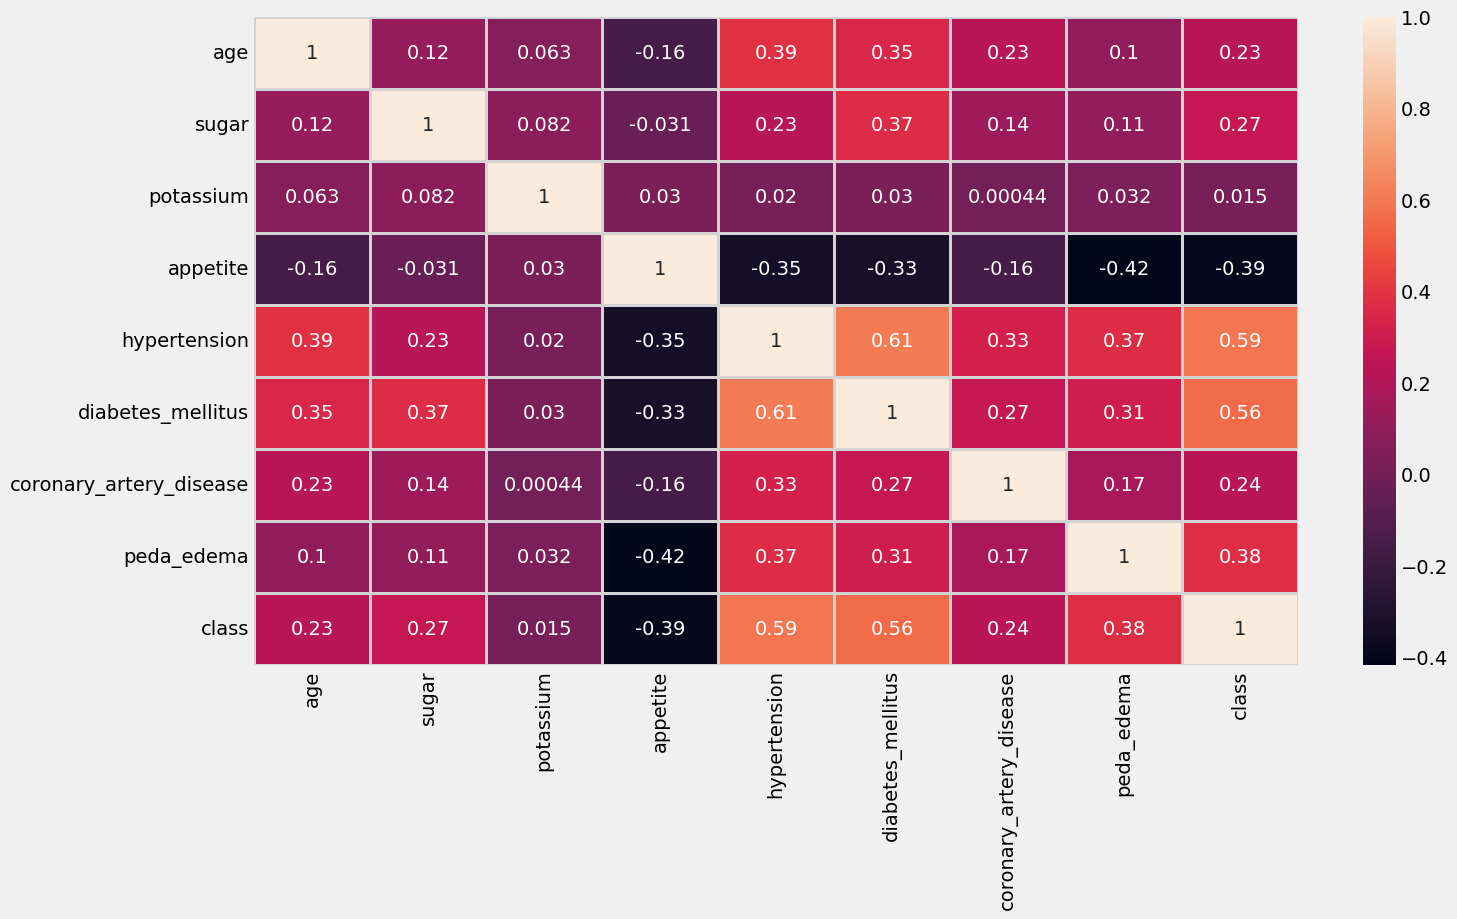

In [36]:
plt.figure(figsize = (15, 8))

sns.heatmap(inilagi.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_acc = accuracy_score(y_test, ada.predict(X_test))
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test))
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
etc_acc = accuracy_score(y_test, etc.predict(X_test))

In [40]:
models = {
    'Decision Tree Classifier': dtc_acc,
    'Random Forest Classifier': rd_clf_acc,
    'Ada Boost Classifier': ada_acc,
    'Gradient Boosting Classifier': gb_acc,
    'Extra Trees Classifier': etc_acc
}
models_df = pd.DataFrame(models.items(), columns=['Models', 'Accuracy'])
for i in models_df.index:
    print(f"{models_df['Models'][i]} : {models_df['Accuracy'][i]}")

Decision Tree Classifier : 0.9125
Random Forest Classifier : 0.9
Ada Boost Classifier : 0.925
Gradient Boosting Classifier : 0.9
Extra Trees Classifier : 0.9125


In [41]:
from sklearn.metrics import classification_report, mean_squared_error


model_name = {
    'Decision Tree Classifier': dtc,
    'Random Forest Classifier': rd_clf,
    'Ada Boost Classifier': ada,
    'Gradient Boosting Classifier': gb,
    'Extra Trees Classifier': etc
}
for name, model in model_name.items():
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

=== Decision Tree Classifier ===
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.96      0.90      0.93        50

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

--------------------------------------------------
=== Random Forest Classifier ===
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.94      0.90      0.92        50

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80

--------------------------------------------------
=== Ada Boost Classifier ===
Classification Report:
               precision    recall  f1-score   support

           0       0.8

In [42]:
contoh=inilagi[inilagi['class']==0].sample(1)
contoh= pd.DataFrame(contoh)
contoh 

,age,sugar,potassium,appetite,hypertension,diabetes_mellitus,coronary_artery_disease,peda_edema,class
301,44.0,10,4.5,1,0,0,0,0,0


In [ ]:
# import pickle

In [ ]:
# name_file = 'model.pkl'
# with open(name_file, 'wb') as file :
#     pickle.dump(rd_clf, file)